<a href="https://colab.research.google.com/github/AlexsanderProgrammer/AlexsanderProgrammer/blob/main/prev_acoes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 63 kB 1.6 MB/s 
     |████████████████████████████████| 6.4 MB 11.0 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importando as Bibliotecas

In [ ]:
from fbprophet import Prophet # Biblioteca para prever o preço das ações

import pandas as pd # Biblioteca usada para a manipulação dos dados
import numpy as np # Biblioteca usada para calculos
import matplotlib.pyplot as plt # Biblioteca usada para plotar(mostrar) os gráficos

import pandas_datareader.data as web #Biblioteca usada para pegar os dados da internet

from pylab import rcParams # Bblioteca para dimensionar o grafico
rcParams['figure.figsize'] = 15,8

# Coletando os dados

In [ ]:
p = web.get_data_yahoo('PETR4.SA', period='2y')

TypeError: ignored

In [ ]:
p

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-06-02,20.750000,21.400000,20.600000,21.400000,14.267127,77235100
2020-06-03,21.860001,21.910000,21.410000,21.469999,14.313794,86219700
2020-06-04,21.389999,21.780001,21.040001,21.430000,14.287127,107401400
2020-06-05,22.290001,23.030001,22.059999,22.100000,14.733810,114137700
2020-06-08,22.549999,22.590000,22.010000,22.530001,15.020486,82444400
...,...,...,...,...,...,...
2022-05-27,32.150002,32.150002,30.570000,30.600000,30.600000,118295600
2022-05-30,30.840000,30.870001,29.120001,29.990000,29.990000,98110100
2022-05-31,30.410000,30.620001,29.809999,30.059999,30.059999,83598000


# Pegando os dados da coluna alvo

In [ ]:
c = p['Adj Close']
c

Date
2020-06-02    14.267127
2020-06-03    14.313794
2020-06-04    14.287127
2020-06-05    14.733810
2020-06-08    15.020486
                ...    
2022-05-27    30.600000
2022-05-30    29.990000
2022-05-31    30.059999
2022-06-01    30.020000
2022-06-02    29.760000
Name: Adj Close, Length: 497, dtype: float64

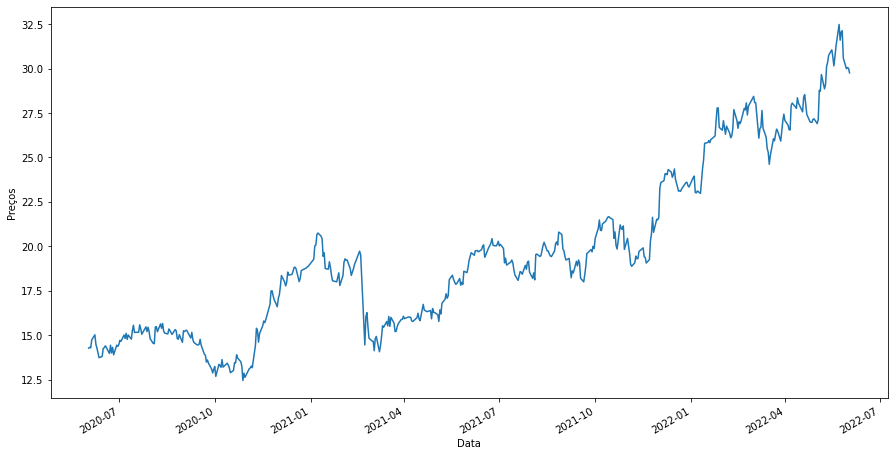

In [ ]:
c.plot()
plt.xlabel('Data', size=10)
plt.ylabel('Preços', size=10)
plt.show()

# Criando um novo dataframe com a coluna alvo

In [ ]:
type(c)

pandas.core.series.Series

In [ ]:
d = pd.DataFrame(c)

In [ ]:
d

,Adj Close
Date,
2020-06-02,14.267127
2020-06-03,14.313794
2020-06-04,14.287127
2020-06-05,14.733810
2020-06-08,15.020486
...,...
2022-05-27,30.600000
2022-05-30,29.990000
2022-05-31,30.059999


### Como temos as datas como indices precisamos resetar o indice

In [ ]:
d = d.reset_index('Date')

In [ ]:
d

,Date,Adj Close
0,2020-06-02,14.267127
1,2020-06-03,14.313794
2,2020-06-04,14.287127
3,2020-06-05,14.733810
4,2020-06-08,15.020486
...,...,...
492,2022-05-27,30.600000
493,2022-05-30,29.990000
494,2022-05-31,30.059999
495,2022-06-01,30.020000


# Renomeando as colunas para 'ds' e 'y' que é o que a biblioteca recomenda

In [ ]:
d.columns = ['ds','y']

In [ ]:
d

,ds,y
0,2020-06-02,14.267127
1,2020-06-03,14.313794
2,2020-06-04,14.287127
3,2020-06-05,14.733810
4,2020-06-08,15.020486
...,...,...
492,2022-05-27,30.600000
493,2022-05-30,29.990000
494,2022-05-31,30.059999
495,2022-06-01,30.020000


# Instanciando e treinando a biblioteca

In [ ]:
modelo = Prophet()

modelo.fit(d)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


# Criando as datas que vamos prever

In [ ]:
data_futuro = pd.date_range(start='2022-06-01', end='2022-12-01')

In [ ]:
data_futuro

DatetimeIndex(['2022-06-01', '2022-06-02', '2022-06-03', '2022-06-04',
               '2022-06-05', '2022-06-06', '2022-06-07', '2022-06-08',
               '2022-06-09', '2022-06-10',
               ...
               '2022-11-22', '2022-11-23', '2022-11-24', '2022-11-25',
               '2022-11-26', '2022-11-27', '2022-11-28', '2022-11-29',
               '2022-11-30', '2022-12-01'],
              dtype='datetime64[ns]', length=184, freq='D')

### como as datas estão no formato series precisamos tranformar para dataframe antes de continuar

In [ ]:
df = pd.DataFrame(data_futuro)

In [ ]:
df.columns = ['ds'] #Renomeando a coluna alvo para ds

In [ ]:
df

,ds
0,2022-06-01
1,2022-06-02
2,2022-06-03
3,2022-06-04
4,2022-06-05
...,...
179,2022-11-27
180,2022-11-28
181,2022-11-29
182,2022-11-30


# Prevendo

In [ ]:
previsao = modelo.predict(df)

In [ ]:
previsao

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-06-01,31.499351,30.807364,32.938217,31.499351,31.499351,0.355834,0.355834,0.355834,-0.037223,-0.037223,-0.037223,0.393057,0.393057,0.393057,0.0,0.0,0.0,31.855185
1,2022-06-02,31.555587,30.947463,33.113088,31.555587,31.555587,0.374526,0.374526,0.374526,-0.038792,-0.038792,-0.038792,0.413318,0.413318,0.413318,0.0,0.0,0.0,31.930113
2,2022-06-03,31.611823,30.878804,32.968233,31.611823,31.611823,0.369146,0.369146,0.369146,-0.065300,-0.065300,-0.065300,0.434446,0.434446,0.434446,0.0,0.0,0.0,31.980969
3,2022-06-04,31.668059,31.223093,33.345781,31.668059,31.668059,0.671550,0.671550,0.671550,0.214813,0.214813,0.214813,0.456738,0.456738,0.456738,0.0,0.0,0.0,32.339609
4,2022-06-05,31.724295,31.402879,33.437765,31.724295,31.724295,0.695217,0.695217,0.695217,0.214813,0.214813,0.214813,0.480404,0.480404,0.480404,0.0,0.0,0.0,32.419512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,2022-11-27,41.565595,40.429206,43.718922,40.362190,42.721167,0.530268,0.530268,0.530268,0.214813,0.214813,0.214813,0.315456,0.315456,0.315456,0.0,0.0,0.0,42.095863
180,2022-11-28,41.621831,40.368353,43.492519,40.409362,42.790185,0.333419,0.333419,0.333419,-0.145591,-0.145591,-0.145591,0.479010,0.479010,0.479010,0.0,0.0,0.0,41.955250
181,2022-11-29,41.678067,40.554446,43.795768,40.466480,42.859159,0.493969,0.493969,0.493969,-0.142720,-0.142720,-0.142720,0.636689,0.636689,0.636689,0.0,0.0,0.0,42.172036
182,2022-11-30,41.734303,40.819280,44.089910,40.521512,42.929012,0.749975,0.749975,0.749975,-0.037223,-0.037223,-0.037223,0.787198,0.787198,0.787198,0.0,0.0,0.0,42.484278


In [ ]:
previsao[ ['ds','yhat','yhat_lower','yhat_upper'] ]

,ds,yhat,yhat_lower,yhat_upper
0,2022-06-01,31.855185,30.807364,32.938217
1,2022-06-02,31.930113,30.947463,33.113088
2,2022-06-03,31.980969,30.878804,32.968233
3,2022-06-04,32.339609,31.223093,33.345781
4,2022-06-05,32.419512,31.402879,33.437765
...,...,...,...,...
179,2022-11-27,42.095863,40.429206,43.718922
180,2022-11-28,41.955250,40.368353,43.492519
181,2022-11-29,42.172036,40.554446,43.795768
182,2022-11-30,42.484278,40.819280,44.089910


In [ ]:
previsao.describe()

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
count,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.0,184.0,184.0,184.000000
mean,36.878728,35.343328,37.768525,36.440185,37.371607,-0.339196,-0.339196,-0.339196,0.000948,0.000948,0.000948,-0.340144,-0.340144,-0.340144,0.0,0.0,0.0,36.539532
std,3.106301,2.323883,2.639854,2.753581,3.485673,0.921909,0.921909,0.921909,0.068222,0.068222,0.068222,0.918272,0.918272,0.918272,0.0,0.0,0.0,2.466467
min,31.542179,30.994962,33.020793,31.542179,31.542179,-2.181269,-2.181269,-2.181269,-0.077497,-0.077497,-0.077497,-2.103773,-2.103773,-2.103773,0.0,0.0,0.0,32.037106
25%,34.210453,33.328708,35.463460,34.099555,34.348570,-1.147899,-1.147899,-1.147899,-0.077497,-0.077497,-0.077497,-1.168126,-1.168126,-1.168126,0.0,0.0,0.0,34.437585
50%,36.878728,35.479386,37.839843,36.527762,37.315413,0.022972,0.022972,0.022972,-0.029910,-0.029910,-0.029910,0.049927,0.049927,0.049927,0.0,0.0,0.0,36.624933
75%,39.547002,37.115613,39.851614,38.819886,40.371186,0.401940,0.401940,0.401940,0.074740,0.074740,0.074740,0.361153,0.361153,0.361153,0.0,0.0,0.0,38.480118
max,42.215277,41.687314,44.880462,41.046394,43.441800,1.051607,1.051607,1.051607,0.099669,0.099669,0.099669,0.951938,0.951938,0.951938,0.0,0.0,0.0,43.266884


Plotando no grafico

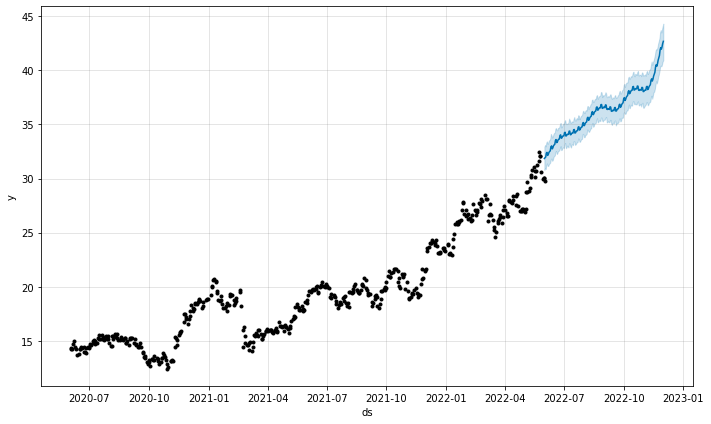

In [ ]:
modelo.plot(previsao)
plt.show()

# Plotando os componentes da previsão

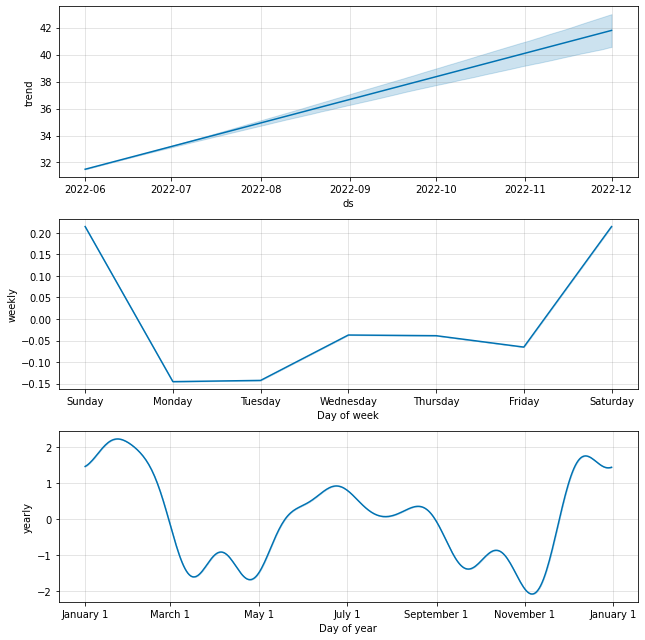

In [ ]:
modelo.plot_components(previsao)
plt.show()

# Fazendo o plot dinâmico com a biblioteca Plotly

In [ ]:
from fbprophet.plot import plot_plotly, plot_components_plotly

In [ ]:
plot_plotly(modelo,previsao)

NameError: ignored

# Agora vamos separar os dados de treino e teste

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
d_train,d_test = train_test_split(d,test_size=0.3,shuffle=False)

In [ ]:
modelo2 = Prophet() # Instanciando

modelo2.fit(d_train) # Treinando

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
prev2 = modelo2.predict(pd.DataFrame(d_test['ds'])) # Prevendo

# Medindo o erro

In [ ]:
y_prev = prev2['yhat'].values
y_true = d_test['y'].values

In [ ]:
mean_squared_error(y_true,y_prev)

17.162921277880134

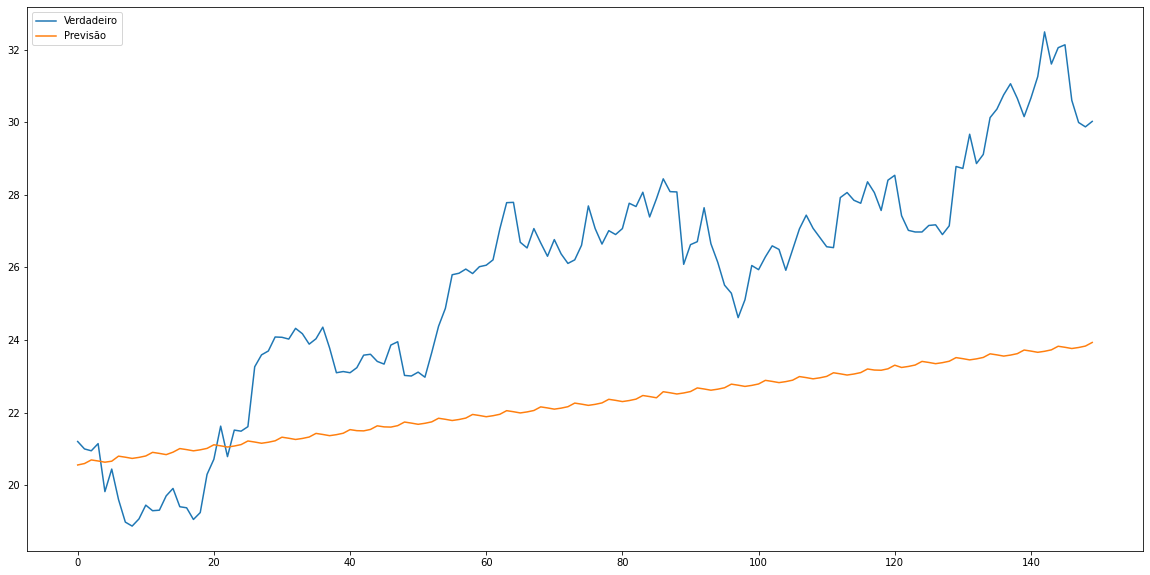

In [ ]:
plt.plot(y_true, label='Verdadeiro')
plt.plot(y_prev, label='Previsão')
plt.legend()

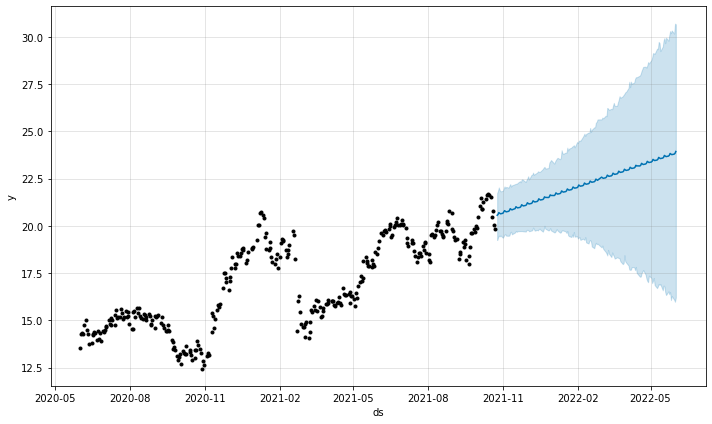

In [ ]:
modelo2.plot(prev2)
plt.show()

# FIM